## 1. Find missing values

In [1]:
import pandas as pd
import seaborn as sns

### a) Read in the file "student-mat-missing-data.csv" into a Pandas DataFrame

In [2]:
students = pd.read_csv("Filer/student-mat-missing-data.csv")
students = students.drop(students.columns[0], axis=1)
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5.0,5.0,4.0,4,5,4.0,11.0,9,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2.0,4.0,5.0,3,4,2.0,3.0,14,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5.0,5.0,3.0,3,3,3.0,3.0,10,8,7
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4.0,4.0,1.0,3,4,5.0,0.0,11,12,10


### b) Do some initial explorations with the methods to get an understanding of the dataset:

In [3]:
#students.info() #Gives the column, non-null count and the datatype
#students.describe() #Gives descriptive statistics
#students.value_counts("age") #Gives the count for each age, for example 104 students are 16 years old
#pd.unique(students["age"]) #Gives the unique values for a variable
#students.columns #Returns all the columns in the dataset

### c) Create a function that takes in a DataFrame as input parameter and plots a barplot with the columns that have missing values. Put this function into a file called data_utils.py. 
### d) Now import your function from the module data_utils and use it to visualize NaNs in your dataset.

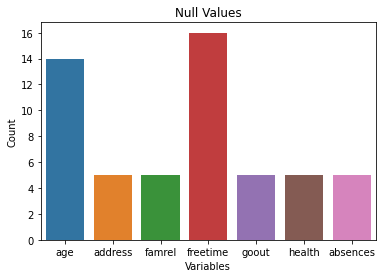

In [4]:
from data_utils import plot_missing #Imports the function plot_missing from the data_utils module
plot_missing(students) #Use it to plot the missing values for the students data set

### e) Find all rows where the freetime is NaN.

In [5]:
#Saves all of the rows that have missing values for the freetime variable in a list
nulls_freetime = students.index[students["freetime"].isnull() == True].tolist()
nulls_freetime

[87, 99, 130, 149, 151, 160, 191, 257, 276, 293, 308, 330, 343, 359, 372, 385]

### f) Find all rows where the freetime or the age is NaN.

In [6]:
#VERSION 1

#Saves all of the rows that have missing values for the age variable in a list
nulls_age = students.index[students["age"].isnull() == True].tolist()

#Creates a list of all of the rows that have missing values for either age or freetime
#We loop through the indexes in nulls_age and only adds them if they are not already in the nulls_freetime list
nulls_freetime_age = sorted(nulls_freetime + [row for row in nulls_age if row not in nulls_freetime])
print(nulls_freetime_age)

[20, 71, 87, 99, 102, 106, 121, 130, 149, 151, 160, 188, 191, 214, 257, 270, 276, 293, 308, 330, 343, 348, 359, 372, 385]


In [27]:
#VERSION 2
nulls_freetime_age = students.index[students["age"].isnull() | students["freetime"].isnull() == True].tolist()
print(nulls_freetime_age)

[20, 71, 87, 99, 102, 106, 121, 130, 149, 151, 160, 188, 191, 214, 257, 270, 276, 293, 308, 330, 343, 348, 359, 372, 385]


### g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

In [7]:
missing_rowwise = pd.DataFrame({"Missing Values":students.isnull().sum(axis=1)}) #Sums all of the missing values on the rows axis (1)
missing_rowwise_above1 = missing_rowwise[missing_rowwise["Missing Values"] > 1]
print(f"{missing_rowwise_above1}\n")

print(f"The {len(missing_rowwise_above1)} rows that are missing more than one value constitutes {len(missing_rowwise_above1)/len(students):.4f} of the dataset")

     Missing Values
160               7
191               7
276               7
293               7
385               7

The 5 rows that are missing more than one value constitutes 0.0127 of the dataset


## 2. Clean the Data

### a) Now remove these rows and use your missing-value utility function visualize the remaining NaNs.

In [8]:
students_miss_del = students.drop(missing_rowwise_above1.index, axis=0).reset_index(drop=True)
students_miss_del

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,MS,M,20.0,U,LE3,A,2,2,services,services,...,5.0,5.0,4.0,4,5,4.0,11.0,9,9,9
386,MS,M,17.0,U,LE3,T,3,1,services,services,...,2.0,4.0,5.0,3,4,2.0,3.0,14,16,16
387,MS,M,21.0,R,GT3,T,1,1,other,other,...,5.0,5.0,3.0,3,3,3.0,3.0,10,8,7
388,MS,M,18.0,R,LE3,T,3,2,services,other,...,4.0,4.0,1.0,3,4,5.0,0.0,11,12,10


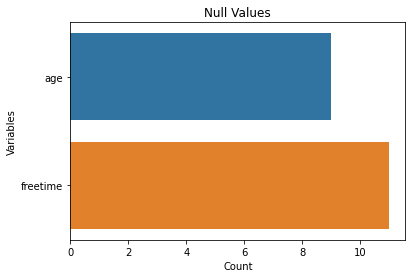

In [9]:
plot_missing(students_miss_del, bars_at_x_axis=False)

### b) Visualising the age distribution in the dataset using a histogram.

<AxesSubplot:xlabel='age', ylabel='Count'>

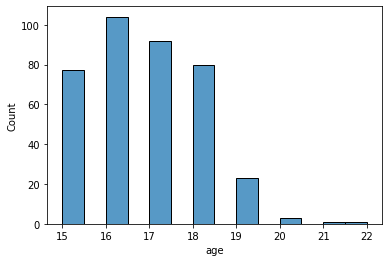

In [10]:
sns.histplot(students_miss_del, x="age", binwidth=0.5)

### c) Check which columns there are in the dataset to see what can be utilised in determining the age.

In [11]:
print(students_miss_del.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


### d) The column higher seems interesting. Let's see which unique values it can have.

In [12]:
print(students_miss_del["higher"].unique())

['yes' 'no']


### e) Let's see if we can see some connection between age distribution and higher. Make 3 subplots of age histograms.

[Text(0.5, 1.0, 'Age Distribution - Higher is No'), Text(0.5, 0, 'Age')]

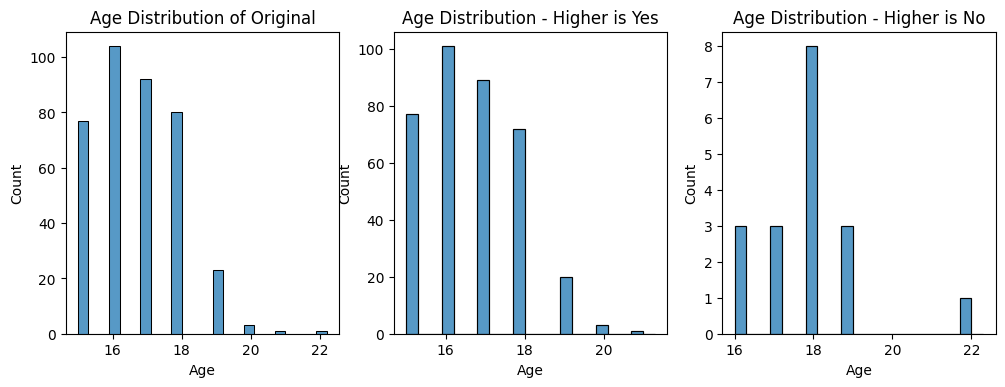

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, dpi=100, figsize=(12, 4)) #1 row, 3 columns
sns.histplot(data=students_miss_del, x="age", binwidth=0.3, ax=ax[0]).set(title="Age Distribution of Original", xlabel="Age")
sns.histplot(data=students_miss_del[students_miss_del["higher"] == "yes"], x="age", binwidth=0.3, ax=ax[1]).set(title="Age Distribution - Higher is Yes", xlabel="Age")
sns.histplot(data=students_miss_del[students_miss_del["higher"] == "no"], x="age", binwidth=0.3, ax=ax[2]).set(title="Age Distribution - Higher is No", xlabel="Age")

### f) Start with creating a new column called Alcohol, which is a sum of Dalc and Walc columns.

In [14]:
students_miss_del["Alcohol"] = students_miss_del["Dalc"] + students_miss_del["Walc"]
students_miss_del

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Alcohol
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,3.0,4.0,1,1,3.0,6.0,5,6,6,2
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3.0,3.0,1,1,3.0,4.0,5,5,6,2
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,3.0,2.0,2,3,3.0,10.0,7,8,10,5
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,2.0,2.0,1,1,5.0,2.0,15,14,15,2
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,3.0,2.0,1,2,5.0,4.0,6,10,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,MS,M,20.0,U,LE3,A,2,2,services,services,...,5.0,4.0,4,5,4.0,11.0,9,9,9,9
386,MS,M,17.0,U,LE3,T,3,1,services,services,...,4.0,5.0,3,4,2.0,3.0,14,16,16,7
387,MS,M,21.0,R,GT3,T,1,1,other,other,...,5.0,3.0,3,3,3.0,3.0,10,8,7,6
388,MS,M,18.0,R,LE3,T,3,2,services,other,...,4.0,1.0,3,4,5.0,0.0,11,12,10,7


### g) Make a barchart for alcohol consumption vs age.

[Text(0.5, 1.0, 'Alcohol Consumption per Age Group'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Alcohol Consumption')]

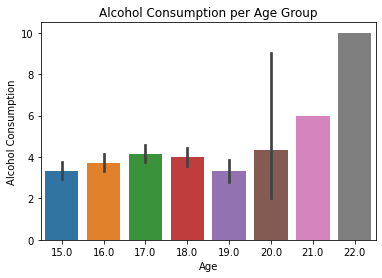

In [15]:
sns.barplot(data=students_miss_del, x="age", y="Alcohol").set(title="Alcohol Consumption per Age Group", xlabel="Age", ylabel="Alcohol Consumption")

### h) Fill in the missing values and visualise them
- alcohol level >= 4 -> 16, 17 or 18 years old -> take median to simplify
- alcohol level < 4 -> 15 years old

In [17]:
#Checks the indexes of students with missing values for age
print(students_miss_del.index[students_miss_del["age"].isnull() == True].tolist())

#Saves them and prints them 
missing_age = students_miss_del.iloc[[20, 71, 102, 106, 121, 187, 212, 268, 344]]
missing_age

[20, 71, 102, 106, 121, 187, 212, 268, 344]


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Alcohol
20,GP,M,NaN,U,GT3,T,4,3,teacher,other,...,4.0,1.0,1,1,1.0,0.0,13,14,15,2
71,GP,M,NaN,U,GT3,T,4,2,other,other,...,3.0,3.0,1,1,3.0,0.0,10,10,10,2
102,GP,M,NaN,U,GT3,T,4,4,services,other,...,3.0,3.0,1,1,5.0,4.0,10,13,14,2
106,GP,F,NaN,U,GT3,T,2,2,other,other,...,1.0,2.0,1,1,3.0,8.0,7,8,8,2
121,GP,M,NaN,U,GT3,T,2,2,services,services,...,5.0,4.0,1,2,5.0,6.0,16,14,15,3
187,GP,F,NaN,U,GT3,A,3,3,health,other,...,3.0,3.0,1,3,3.0,6.0,8,7,9,4
212,GP,F,NaN,R,LE3,T,4,4,services,other,...,2.0,1.0,1,2,3.0,12.0,8,10,10,3
268,GP,F,NaN,U,GT3,T,3,3,other,services,...,3.0,5.0,3,3,5.0,15.0,9,9,9,6
344,GP,F,NaN,U,GT3,T,4,3,health,other,...,4.0,3.0,1,3,4.0,0.0,13,15,15,4


In [20]:
#Fills in the missing values with either 17 or 15
high_alc = students_miss_del["Alcohol"] >= 4 #high_alc holds True if alcohol consumption is 4 or above and False otherwise. For all students.
print(high_alc)
students_miss_del["age"] = students_miss_del["age"].fillna(high_alc.map({True:17, False:15})) #Fills the null values with 17 or 15, based on the bool value in high_alc.
students_miss_del["age"].isnull().sum() #Checks if there are still missing values.

0      False
1      False
2       True
3      False
4      False
       ...  
385     True
386     True
387     True
388     True
389     True
Name: Alcohol, Length: 390, dtype: bool


0

In [21]:
#Checks if age is filled in correctly
previous_missing_age = students_miss_del.iloc[[20, 71, 102, 106, 121, 187, 212, 268, 344]]
previous_missing_age

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Alcohol
20,GP,M,15.0,U,GT3,T,4,3,teacher,other,...,4.0,1.0,1,1,1.0,0.0,13,14,15,2
71,GP,M,15.0,U,GT3,T,4,2,other,other,...,3.0,3.0,1,1,3.0,0.0,10,10,10,2
102,GP,M,15.0,U,GT3,T,4,4,services,other,...,3.0,3.0,1,1,5.0,4.0,10,13,14,2
106,GP,F,15.0,U,GT3,T,2,2,other,other,...,1.0,2.0,1,1,3.0,8.0,7,8,8,2
121,GP,M,15.0,U,GT3,T,2,2,services,services,...,5.0,4.0,1,2,5.0,6.0,16,14,15,3
187,GP,F,17.0,U,GT3,A,3,3,health,other,...,3.0,3.0,1,3,3.0,6.0,8,7,9,4
212,GP,F,15.0,R,LE3,T,4,4,services,other,...,2.0,1.0,1,2,3.0,12.0,8,10,10,3
268,GP,F,17.0,U,GT3,T,3,3,other,services,...,3.0,5.0,3,3,5.0,15.0,9,9,9,6
344,GP,F,17.0,U,GT3,T,4,3,health,other,...,4.0,3.0,1,3,4.0,0.0,13,15,15,4


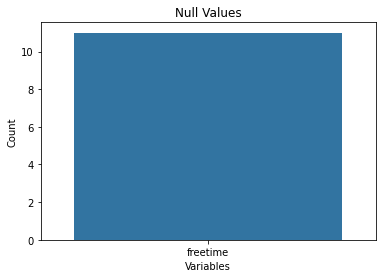

In [22]:
plot_missing(students_miss_del)

## 3. Clean freetime column

<AxesSubplot:xlabel='freetime', ylabel='studytime'>

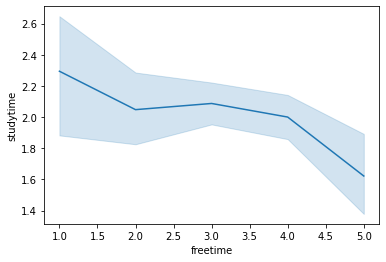

In [28]:
sns.lineplot(data=students_miss_del, x="freetime", y="studytime")

<AxesSubplot:xlabel='freetime', ylabel='goout'>

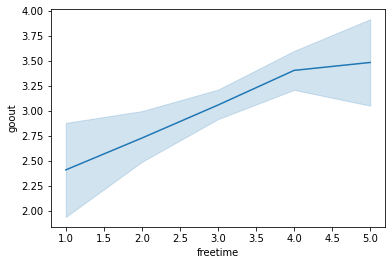

In [32]:
sns.lineplot(data=students_miss_del, x="freetime", y="goout")

In [31]:
students_miss_del.corr(method="pearson")

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Alcohol
age,1.000000,-0.168186,-0.167551,0.071599,-0.002704,0.241002,0.046870,0.021943,0.135962,0.130538,0.119707,-0.069036,0.164301,-0.057704,-0.140283,-0.160784,0.136261
Medu,-0.168186,1.000000,0.623448,-0.173818,0.064302,-0.237710,0.001676,0.042781,0.064163,0.018440,-0.049948,-0.046847,0.101146,0.200848,0.211406,0.214174,-0.024091
Fedu,-0.167551,0.623448,1.000000,-0.154681,-0.004052,-0.250613,-0.003194,-0.012653,0.033642,-0.000753,-0.021455,0.017509,0.033386,0.193131,0.166289,0.151426,-0.014246
traveltime,0.071599,-0.173818,-0.154681,1.000000,-0.106993,0.090717,-0.013286,-0.015014,0.036849,0.140346,0.136999,0.002825,-0.032770,-0.096488,-0.155720,-0.117227,0.151878
studytime,-0.002704,0.064302,-0.004052,-0.106993,1.000000,-0.165649,0.040062,-0.137203,-0.062077,-0.191911,-0.254105,-0.071878,-0.070963,0.147765,0.123961,0.082810,-0.250962
failures,0.241002,-0.237710,-0.250613,0.090717,-0.165649,1.000000,-0.037307,0.080365,0.128586,0.131502,0.142115,0.061207,0.085647,-0.352894,-0.353849,-0.352645,0.151219
famrel,0.046870,0.001676,-0.003194,-0.013286,0.040062,-0.037307,1.000000,0.155374,0.060957,-0.074783,-0.116405,0.096768,-0.049343,0.028644,-0.013049,0.051820,-0.109064
freetime,0.021943,0.042781,-0.012653,-0.015014,-0.137203,0.080365,0.155374,1.000000,0.262200,0.205573,0.123633,0.069271,-0.005928,0.023769,-0.013357,0.009804,0.172921
goout,0.135962,0.064163,0.033642,0.036849,-0.062077,0.128586,0.060957,0.262200,1.000000,0.266617,0.417053,-0.002966,0.094342,-0.150686,-0.165528,-0.138388,0.390162
Dalc,0.130538,0.018440,-0.000753,0.140346,-0.191911,0.131502,-0.074783,0.205573,0.266617,1.000000,0.648518,0.076830,0.137618,-0.092431,-0.062477,-0.050634,0.869787
